In [56]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange


In [38]:
Datos_KBr = [42, 30, 31, 25, 25, 27, 25, 32, 29, 26,
             30, 80, 50, 153, 259, 49, 25, 43, 38, 29,
             42, 40, 38, 48, 65, 44, 33, 42, 36, 40,
             37, 46, 51, 32, 57, 63, 81, 64, 59, 60,
             81, 109, 146, 94, 62, 46, 60, 57, 54, 44, 
             54, 51, 35, 60, 51, 50, 58, 50, 53, 63, 65]
Dato_NCl = [75, 69, 73, 45, 51, 43, 42, 27, 31, 23,
            30, 23, 38, 45, 62, 73, 96, 91, 73, 85,
            59, 63, 50, 58, 36, 34, 39, 26, 19, 28,
            25, 18, 25, 16, 23, 28, 19, 22, 28, 37,
            19, 29, 19, 29, 30, 39, 33, 20, 25, 28,
            21, 23, 21, 20, 19, 22, 36, 29, 20, 28, 
            23]

In [39]:
Theta_KBr = np.linspace(20, 80, len(Datos_KBr))
Theta_NCl = np.linspace(20, 80, len(Dato_NCl))

In [40]:
duplas_KBr = list(zip(Datos_KBr, Theta_KBr))
duplas_NaCl = list(zip(Dato_NCl, Theta_NCl))

In [41]:
# Se guardan los 5 picos visibles  en le gráfica
lista_picos_KBr = [max(duplas_KBr[:13]), max(duplas_KBr[13:20]), max(duplas_KBr[20:30]), max(duplas_KBr[30:40]), max(duplas_KBr[40:50])]
lista_picos_NaCl = [max(duplas_NaCl[10:20]), max(duplas_NaCl[30:40]), max(duplas_NaCl[40:50]), max(duplas_NaCl[50:60])]

In [42]:
#Se utilizan esos para hallar el valor de d teniendo en cuenta la Ley de Bragg

Se tiene la ecuación
\begin{equation}
n \lambda = 2 d sen( \theta )
\end{equation}

Despejando:
\begin{equation}
 d = \frac{n \lambda}{2sen( \theta )}
\end{equation}

In [43]:
#Utilizando los theta de cada uno de los picos, se calcula cada uno de los valores de d
def d(theta, n):
    lam = 7.1E-11
    #n = 1
    distancia = (n*lam)/(2*mt.sin((theta/2)*(mt.pi/180)))
    incertidumbre = mt.sin(0.5/(0.5**2))
    return distancia

In [44]:
incertidumbre = ((0.05E-11**2)*(0.5)/((0.5)**2))
incertidumbre

5e-25

In [65]:
picos_lit_KBr = [[23.5, '111'], [27.35, '200'], [37.5, '220'], [48, '222'], [56.1, '400']]
picos_lit_NaCl = [[32.5, '200'], [58, '222'], [68, '400'], [77.5, '420']]

In [66]:
lista_dist_mol_KBr = [(d(i[1], 1)) for i in lista_picos_KBr]
lista_dist_mol_NaCl = [(d(i[1], 1)) for i in lista_picos_NaCl]

In [67]:
l1, l2 = [], []
l1 , l2 = [i[0] for i in lista_picos_KBr], [i[1] for i in lista_picos_KBr]

data_Kbr = pd.DataFrame(list(zip(l1, l2, np.array(l2)/2,lista_dist_mol_KBr)), columns=['Pico de detecciones del KBr', '2θ','θ' ,' Distancia molecular con Bragg'])
data_Kbr

,Pico de detecciones del KBr,2θ,θ,Distancia molecular con Bragg
0,80,31.0,15.5,1.328402e-10
1,259,34.0,17.0,1.214208e-10
2,65,44.0,22.0,9.476608e-11
3,81,56.0,28.0,7.561693e-11
4,146,62.0,31.0,6.892694e-11


In [78]:
lis_dis_lit_KBr = [(d(i[0], 1)) for i in picos_lit_KBr]
lis_dis_lit_NaCl = [(d(i[0], 1)) for i in picos_lit_NaCl]
l3, l4 = [], []
l3, l4 = [i[0] for i in picos_lit_KBr], [i[1] for i in picos_lit_KBr]
l_error = []
l_error = [(abs(100*((np.array(lista_dist_mol_KBr[i])-np.array(lis_dis_lit_KBr[i]))/np.array(lis_dis_lit_KBr[i])))) for i in range(len(lis_dis_lit_KBr))]
data_com_Kbr = pd.DataFrame(list(zip(l4, l1, l2, np.array(l2)/2,lista_dist_mol_KBr,l3,  lis_dis_lit_KBr, l_error)), columns=['Plano','Pico de detecciones del KBr', 
'2θ del KBr','θ' ,' Distancia de planos con Bragg (m)', '2θ Literatura', 'Distancia con la literatura (m)', '% De error'])
data_com_Kbr

,Plano,Pico de detecciones del KBr,2θ del KBr,θ,Distancia de planos con Bragg (m),2θ Literatura,Distancia con la literatura (m),% De error
0,111,80,31.0,15.5,1.328402e-10,23.50,1.743257e-10,23.797714
1,200,259,34.0,17.0,1.214208e-10,27.35,1.501602e-10,19.139164
2,220,65,44.0,22.0,9.476608e-11,37.50,1.104407e-10,14.192790
3,222,81,56.0,28.0,7.561693e-11,48.00,8.728006e-11,13.362880
4,400,146,62.0,31.0,6.892694e-11,56.10,7.549306e-11,8.697643


In [90]:
pol1 = lagrange(l3, lis_dis_lit_KBr)

In [91]:
x1 = np.linspace(20, 62, 1000)
y1 = pol1(x1)

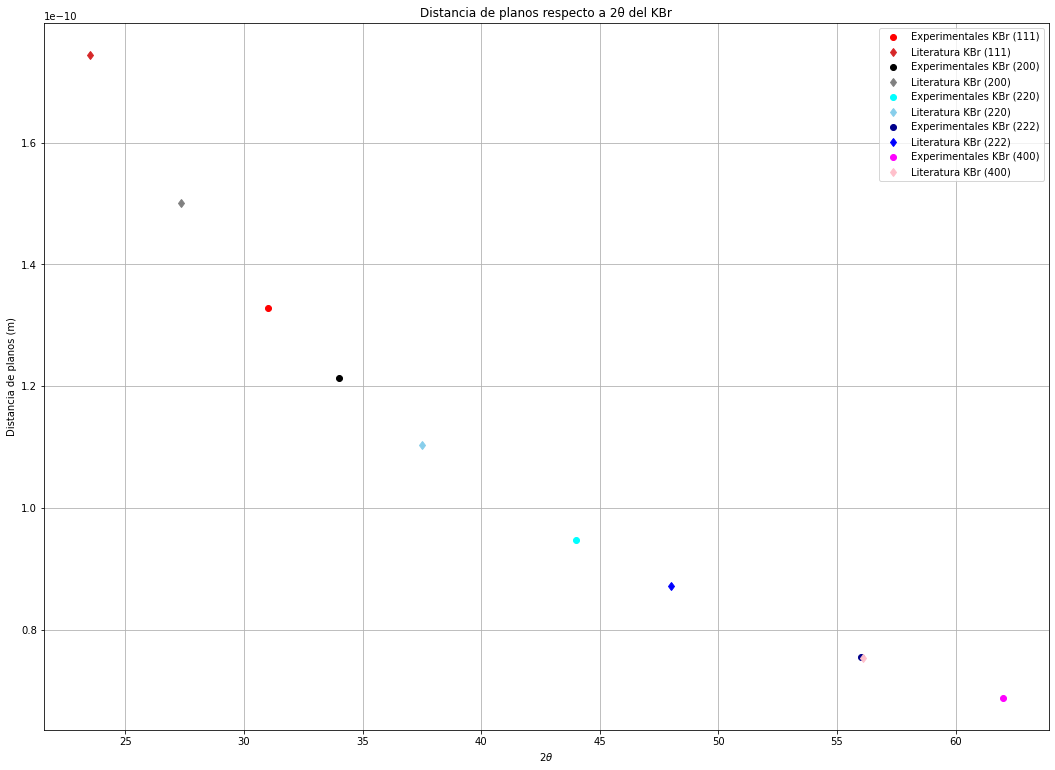

In [95]:
plt.plot(l2[0],lista_dist_mol_KBr[0], 'o', c = 'r', label='Experimentales KBr (111)')
plt.plot(l3[0],lis_dis_lit_KBr[0], 'd', c = 'tab:red', label='Literatura KBr (111)')


plt.plot(l2[1],lista_dist_mol_KBr[1], 'o', c = 'black', label='Experimentales KBr (200)')
plt.plot(l3[1],lis_dis_lit_KBr[1], 'd', c = 'gray', label='Literatura KBr (200)')

plt.plot(l2[2],lista_dist_mol_KBr[2], 'o', c = 'cyan', label='Experimentales KBr (220)')
plt.plot(l3[2],lis_dis_lit_KBr[2], 'd', c = 'skyblue', label='Literatura KBr (220)')

plt.plot(l2[3],lista_dist_mol_KBr[3], 'o', c = 'darkblue', label='Experimentales KBr (222)')
plt.plot(l3[3],lis_dis_lit_KBr[3], 'd', c = 'b', label='Literatura KBr (222)')

plt.plot(l2[4],lista_dist_mol_KBr[4], 'o', c = 'fuchsia', label='Experimentales KBr (400)')
plt.plot(l3[4],lis_dis_lit_KBr[4], 'd', c = 'pink', label='Literatura KBr (400)')
#plt.plot(x1, y1, c='springgreen', label = 'Interpolación datos literatura')

# Hacemos un titulo a la ventana
plt.title('Distancia de planos respecto a 2θ del KBr')
# Hacemos unas etiquetas para los ejes
plt.grid()
plt.xlabel(r'$2 \theta $')
plt.ylabel('Distancia de planos (m)')
plt.legend()
plt.show()

In [73]:
l11, l22 = [], []
l11 , l22 = [i[0] for i in lista_picos_NaCl], [i[1] for i in lista_picos_NaCl]

In [74]:
l33, l44 = [], []
l33, l44 = [i[0] for i in picos_lit_NaCl], [i[1] for i in picos_lit_NaCl]
l_error = []
l_error = [(abs(100*((np.array(lista_dist_mol_NaCl[i])-np.array(lis_dis_lit_NaCl[i]))/np.array(lis_dis_lit_NaCl[i])))) for i in range(len(lis_dis_lit_NaCl))]
data_com_NaCl = pd.DataFrame(list(zip(l44, l11, l22, np.array(l22)/2,lista_dist_mol_NaCl,l33,  lis_dis_lit_NaCl, l_error)), columns=['Plano','Pico de detecciones del NaCl', 
'2θ del NaCl','θ' ,' Distancia de planos con Bragg (m)', '2θ Literatura', 'Distancia con la literatura (m)', '% De error'])
data_com_NaCl

,Plano,Pico de detecciones del NaCl,2θ del NaCl,θ,Distancia de planos con Bragg (m),2θ Literatura,Distancia con la literatura (m),% De error
0,200,96,36.0,18.0,1.148804e-10,32.5,1.268632e-10,9.445429
1,222,37,59.0,29.5,7.209241e-11,58.0,7.322462e-11,1.546218
2,400,39,65.0,32.5,6.607114e-11,68.0,6.348435e-11,4.074690
3,420,36,76.0,38.0,5.766156e-11,77.5,5.671620e-11,1.666825


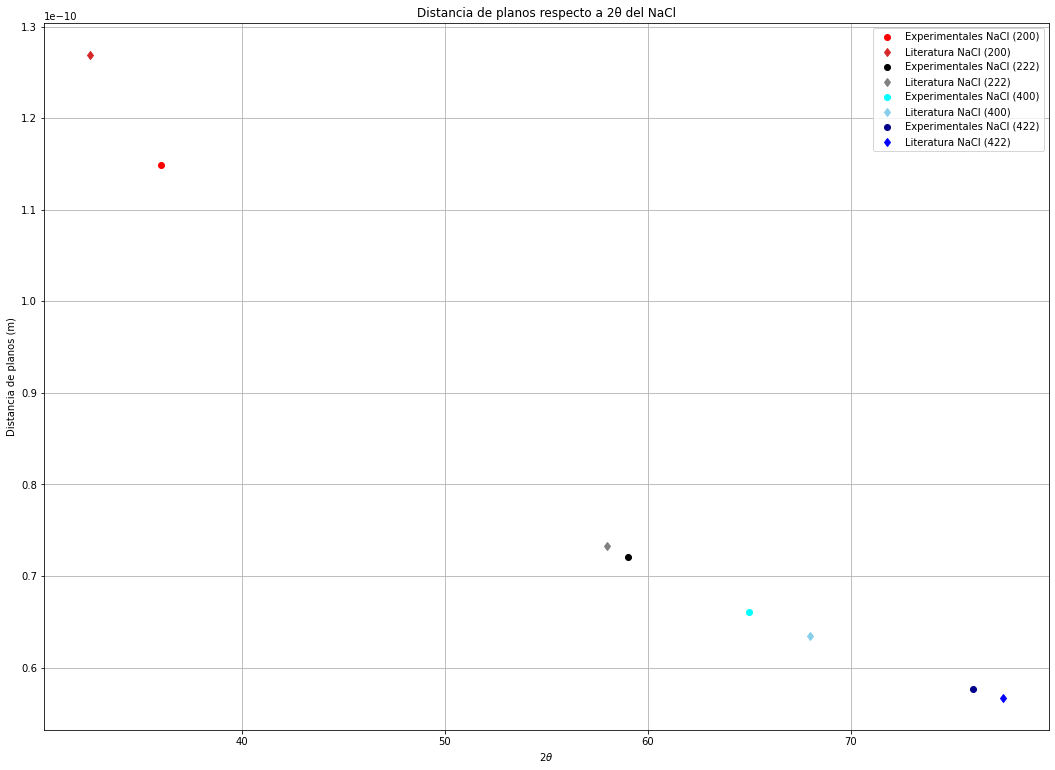

In [96]:
plt.plot(l22[0],lista_dist_mol_NaCl[0], 'o', c = 'r', label='Experimentales NaCl (200)')
plt.plot(l33[0],lis_dis_lit_NaCl[0], 'd', c = 'tab:red', label='Literatura NaCl (200)')


plt.plot(l22[1],lista_dist_mol_NaCl[1], 'o', c = 'black', label='Experimentales NaCl (222)')
plt.plot(l33[1],lis_dis_lit_NaCl[1], 'd', c = 'gray', label='Literatura NaCl (222)')

plt.plot(l22[2],lista_dist_mol_NaCl[2], 'o', c = 'cyan', label='Experimentales NaCl (400)')
plt.plot(l33[2],lis_dis_lit_NaCl[2], 'd', c = 'skyblue', label='Literatura NaCl (400)')

plt.plot(l22[3],lista_dist_mol_NaCl[3], 'o', c = 'darkblue', label='Experimentales NaCl (422)')
plt.plot(l33[3],lis_dis_lit_NaCl[3], 'd', c = 'b', label='Literatura NaCl (422)')

# Hacemos un titulo a la ventana
plt.title('Distancia de planos respecto a 2θ del NaCl')
# Hacemos unas etiquetas para los ejes
plt.grid()
plt.xlabel(r'$2 \theta $')
plt.ylabel('Distancia de planos (m)')
plt.legend()
plt.show()

In [16]:
l1, l2 = [], []
l1 , l2 = [i[0] for i in lista_picos_NaCl], [i[1] for i in lista_picos_NaCl]

data_Kbr = pd.DataFrame(list(zip(l1, l2,np.array(l2)/2,lista_dist_mol_NaCl)), columns=['Pico de detecciones del NaCl', '2θ','θ',  'Distancia molecular con Bragg'])
data_Kbr

,Pico de detecciones del NaCl,2θ,θ,Distancia molecular con Bragg
0,96,36.0,18.0,1.148804e-10
1,37,59.0,29.5,7.209241e-11
2,39,65.0,32.5,6.607114e-11
3,36,76.0,38.0,5.766156e-11


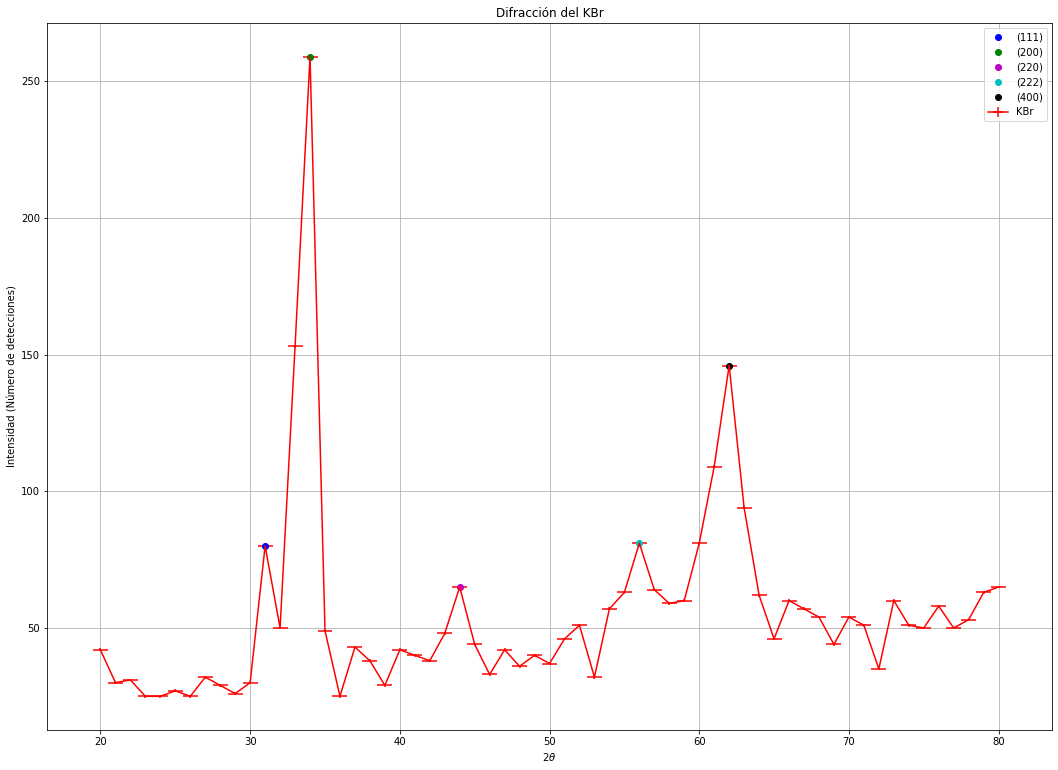

In [55]:
plt.rcParams["figure.figsize"] = (18,13)

plt.errorbar(np.array(Theta_KBr),np.array(Datos_KBr),xerr = 0.5, yerr=0.5, c = 'r', label='KBr')#, c = 'g', label = 'KBr')
plt.plot(lista_picos_KBr[0][1], lista_picos_KBr[0][0], 'o', c = 'b', label = '(111)')
plt.plot(lista_picos_KBr[1][1], lista_picos_KBr[1][0], 'o', c = 'g', label = '(200)')
plt.plot(lista_picos_KBr[2][1], lista_picos_KBr[2][0], 'o', c = 'm', label = '(220)')
plt.plot(lista_picos_KBr[3][1], lista_picos_KBr[3][0], 'o', c = 'c', label = '(222)')
plt.plot(lista_picos_KBr[4][1], lista_picos_KBr[4][0], 'o', c = 'black', label = '(400)')
# Hacemos un titulo a la ventana
plt.title('Difracción del KBr')
# Hacemos unas etiquetas para los ejes
plt.grid()
plt.xlabel(r'$2 \theta $')
plt.ylabel('Intensidad (Número de detecciones)')
plt.legend()
plt.show()

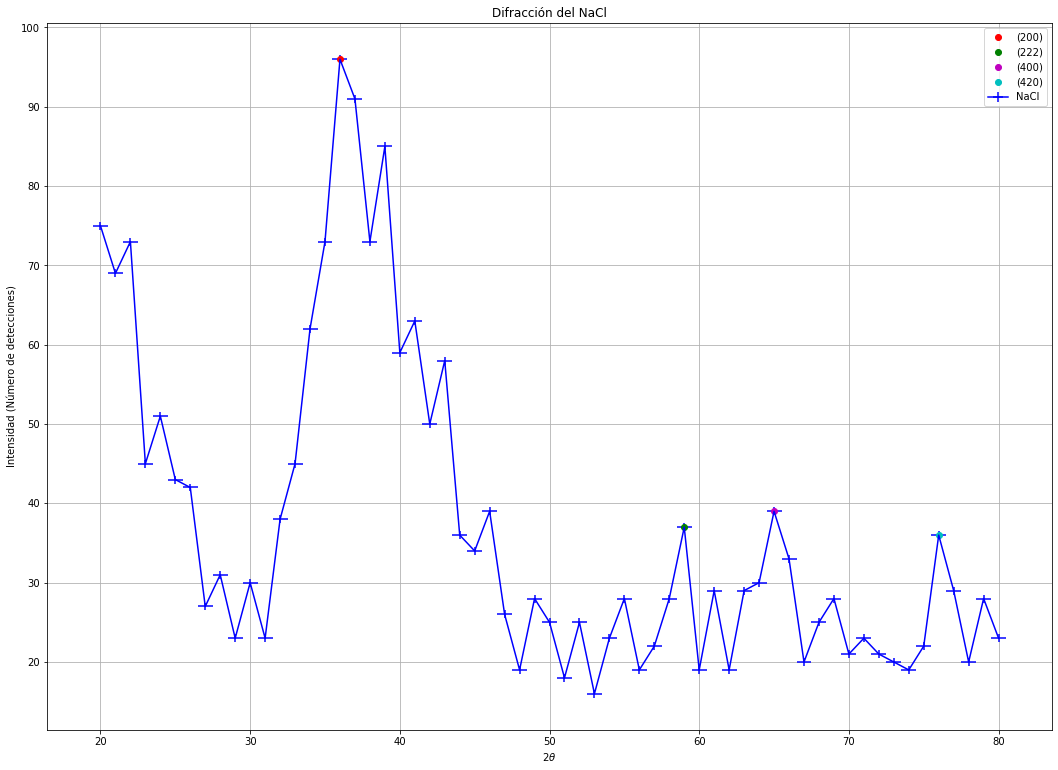

In [81]:
plt.rcParams["figure.figsize"] = (18,13)

plt.errorbar(Theta_NCl,Dato_NCl,xerr=0.5, yerr= 0.5, c = 'b', label = 'NaCl')
plt.plot(lista_picos_NaCl[0][1], lista_picos_NaCl[0][0], 'o', c = 'r', label = '(200)')
plt.plot(lista_picos_NaCl[1][1], lista_picos_NaCl[1][0], 'o', c = 'g', label = '(222)')
plt.plot(lista_picos_NaCl[2][1], lista_picos_NaCl[2][0], 'o', c = 'm', label = '(400)')
plt.plot(lista_picos_NaCl[3][1], lista_picos_NaCl[3][0], 'o', c = 'c', label = '(420)')
# Hacemos un titulo a la ventana
plt.title('Difracción del NaCl')
# Hacemos unas etiquetas para los ejes
plt.xlabel(r'$2 \theta $')
plt.ylabel('Intensidad (Número de detecciones)')
plt.legend()
plt.grid()
plt.show()

In [6]:
Data_KBr_xls = pd.DataFrame(list(zip(Datos_KBr, Theta_KBr)), columns=['Detecciones', '2θ'])

In [7]:
Data_KBr_xls

,Detecciones,2θ
0,42,20.0
1,30,21.0
2,31,22.0
3,25,23.0
4,25,24.0
...,...,...
56,58,76.0
57,50,77.0
58,53,78.0
59,63,79.0


In [8]:
Data_KBr_xls.to_excel('Datos_KBr.xlsx', sheet_name='example')

In [10]:
Data_NaCl_xls = pd.DataFrame(list(zip(Dato_NCl, Theta_NCl)), columns=['Detecciones', '2θ'])
Data_NaCl_xls.to_excel('Datos_NCl.xlsx', sheet_name='example')

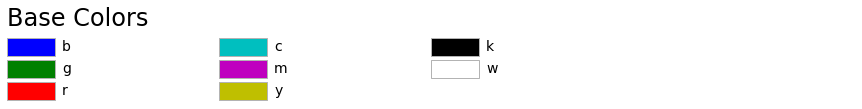

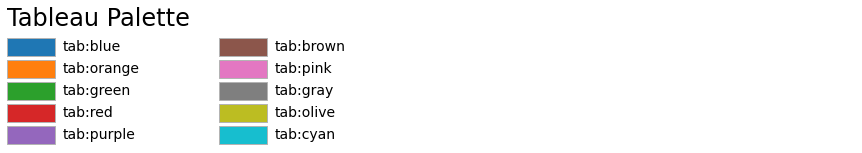

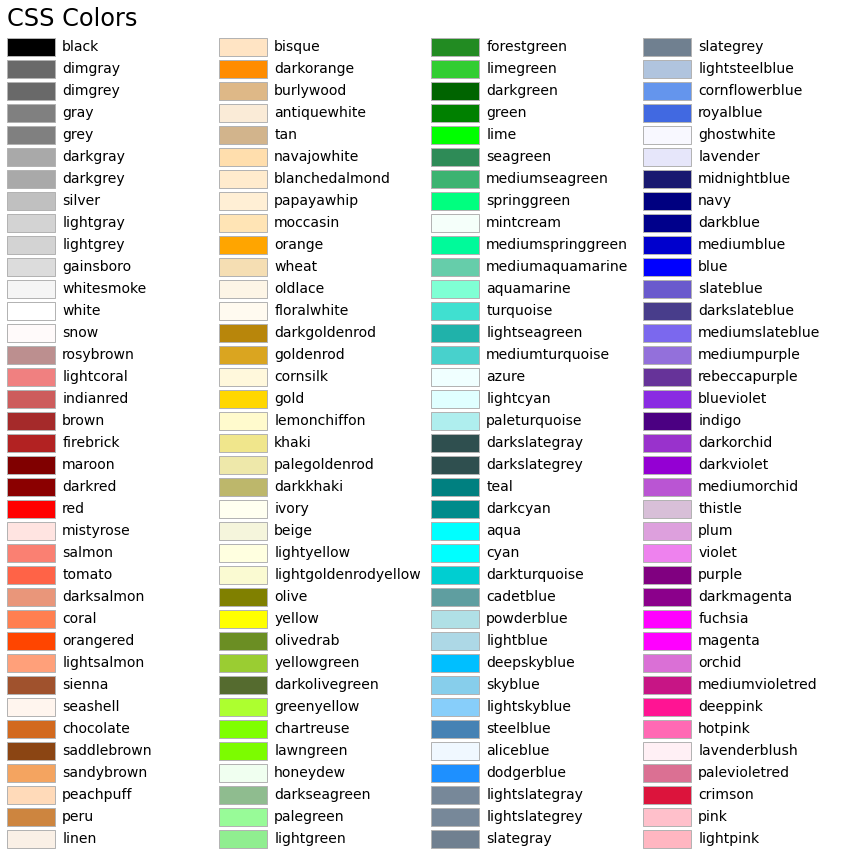

In [76]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()